In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
 !pip install empiricaldist
from empiricaldist import Pmf, Cdf


In [2]:
from google.colab import files
file = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [40]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [ ]:
#Checking missing value

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [61]:
#mengubah type data pada kolom TotalCharge dari object ke numeric

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
#memeriksa missing value pada kolom total charge
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [62]:
#Data dari kolom TotalCharge ada 11 baris yang kosong
#Menghilangkan missing value dari kolom TotalCharge
df.dropna(inplace = True)

In [63]:
#Cek kembali hasil dari penghilangan missing value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#Berhasil

In [ ]:
#Menghitung dan menggambarkan plot dengan value dari kolom Churn sebagai acuan


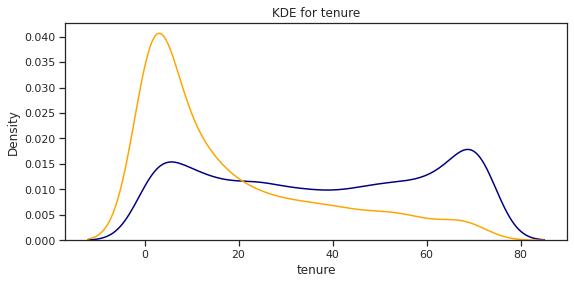

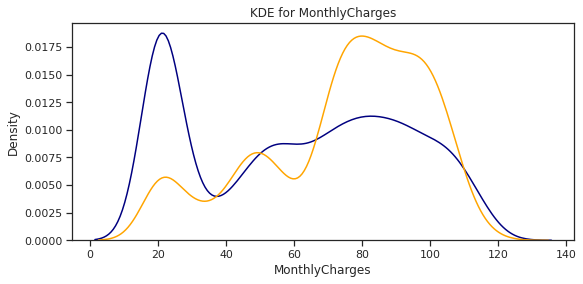

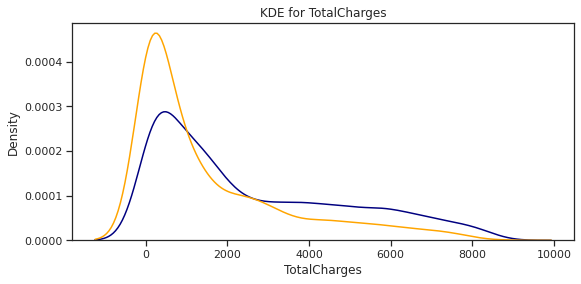

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

In [ ]:
#Menghitung jumlah customer yg masuk dalam kategori tetap dan tidak
#Yes = kustomer tetap
#No = kustomer yang pergi
churn_distribution = Pmf.from_seq(df['Churn'], normalize = False)
display(churn_distribution)

,probs
No,5163
Yes,1869


In [ ]:
#menghitung distribusi
gender_distribution = Pmf.from_seq(df['gender'], normalize = False)
display(gender_distribution)

PhoneService_distribution = Pmf.from_seq(df['PhoneService'], normalize = False)
display(PhoneService_distribution)

MultipleLines_distribution = Pmf.from_seq(df['MultipleLines'], normalize = False)
display(MultipleLines_distribution)

Contract_distribution = Pmf.from_seq(df['Contract'], normalize = False)
display(Contract_distribution)

partner_distribution = Pmf.from_seq(df['Partner'], normalize = False)
display(partner_distribution)


,probs
Female,3483
Male,3549


,probs
No,680
Yes,6352


,probs
No,3385
No phone service,680
Yes,2967


,probs
Month-to-month,3875
One year,1472
Two year,1685


,probs
No,3639
Yes,3393


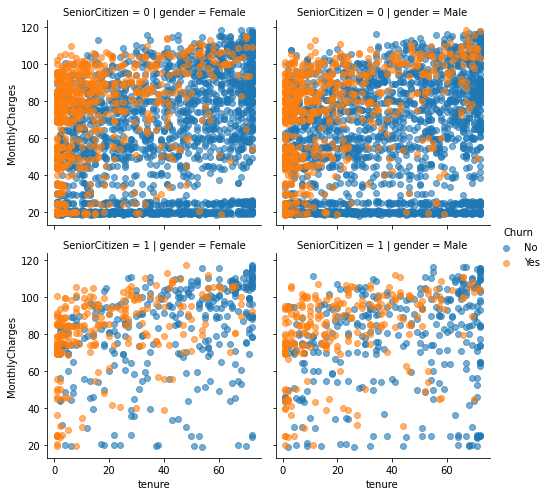

In [ ]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend()

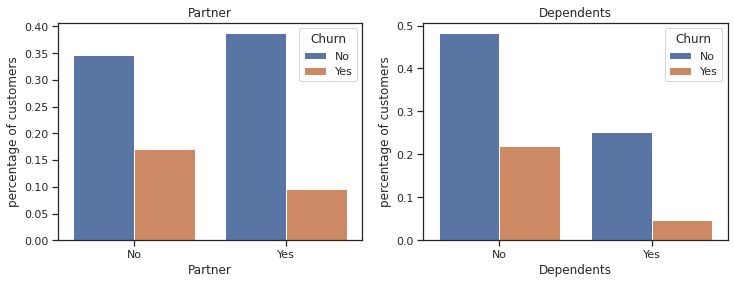

In [ ]:
#Mencari hubungan antara partner dan Depend terhadap Churn
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Partner")
axis[1].set_title("Dependents")
axis_y = "percentage of customers"


part = df.groupby('Partner')['Churn'].value_counts() / len(df)
part = part.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=part, ax=axis[0])


dep = df.groupby('Dependents')["Churn"].value_counts() / len(df)
dep = dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=dep, ax=axis[1])



Dari data di atas, yang tidak memiliki partner lebih mungkin menjadi pelanggan tetap dan yang tidak memiliki ketergantungan lebih mungkin menjadi pelanggan tetap

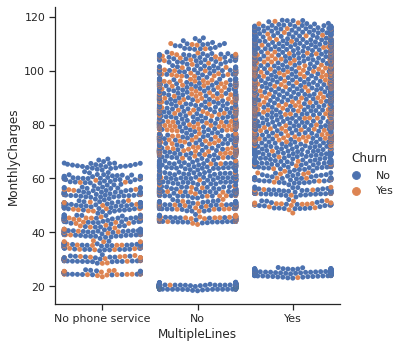

In [ ]:
sns.catplot(data=df, kind="swarm", x="MultipleLines", y="MonthlyCharges", hue="Churn")


Dengan ini, maka jelas terlihat, pelanggat tetap jumlah dan melakukan pembayaran paling banyak pada pelanggan dengan multiple line.

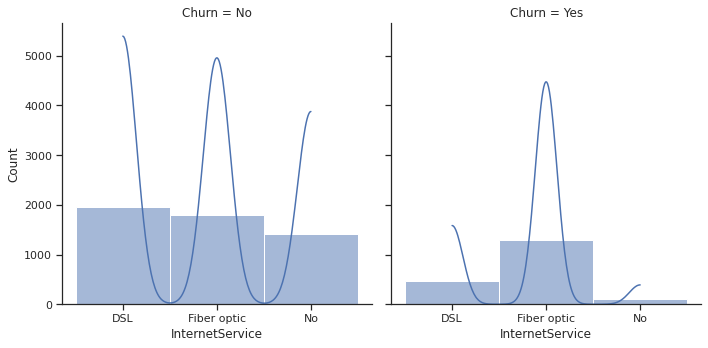

In [ ]:
sns.displot(data=df, x="InternetService", col="Churn", kde=True)

Jumlah pelanggan tetap didominasi oleh pelanggan yg memiliki fiber optic internet service.
Kepadatan dari jumlah pelanggan yg tidak tetap ada pada pelanggan DSL

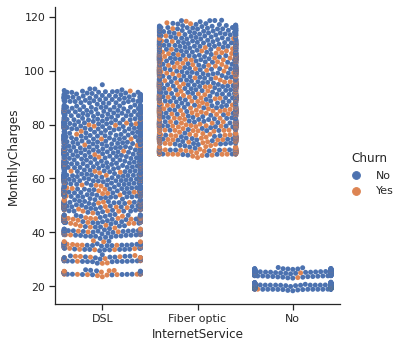

In [ ]:
sns.catplot(data=df, kind="swarm", x="InternetService", y="MonthlyCharges", hue="Churn")

Disini ada hubungan yang cukup aneh, dimana pelanggan tetap cukup banyak di di bagian DSL (sambungan internet yang lambat) bahkan pembayaran bulanannya cukup banyak dan besar, ke dua setelah kategori pelanggan yang memasang fiber optic

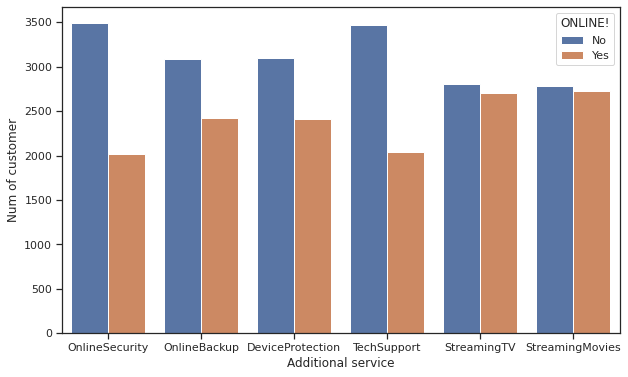

In [ ]:
#Memilih kolom untuk graphic

df_iot = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

#Mengganti value yang bukan kata "No" pada kolom internet servis dengan kata "online"
#Dan memasukkannya ke dalam class dfx
dfx = pd.melt(df[df['InternetService'] != 'No'][df_iot]).rename({'value' : 'ONLINE!'}, axis=1)
plt.figure(figsize=(10, 6))

#Setting graphic plot
ax = sns.countplot(data = dfx, x = 'variable', hue = 'ONLINE!')
ax.set(xlabel = 'Additional service', ylabel = 'Num of customer')
plt.show()


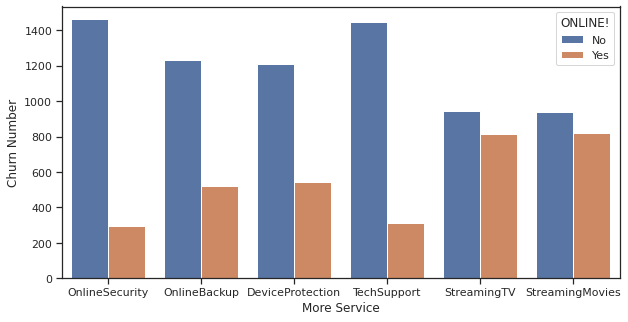

In [ ]:

plt.figure(figsize=(10, 5))
dfx = df[(df.InternetService != "No") & (df.Churn == 'Yes')]
dfx = pd.melt(dfx[df_iot]).rename({'value' : "ONLINE!"}, axis=1)
ax = sns.countplot(data=dfx, x = 'variable', hue = 'ONLINE!', hue_order=['No', 'Yes'])
ax.set(xlabel = 'More Service', ylabel= 'Churn Number')
plt.show()

Dari sini dapat diketahui pelanggan tetap berasal dari pelanggan yang memiliki akses streaming movie dan pelanggan yang pergi terbanyak ada pada kolom online security dan tech support. Pelanggan yang pergi mungkin tidak puas dengan layanan keamanan online dan fasilitas dukungan troubleshooting

In [ ]:
b = df[['PaymentMethod','Churn']]
b.value_counts()



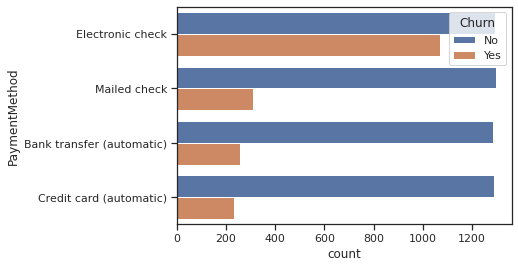

In [ ]:
ax = sns.countplot(y=df["PaymentMethod"], hue="Churn", data=b)

Seperti diagram batang di atas, pelanggan dengan pembayaran elektronik lebih cendrung menjadi pelanggan tetap

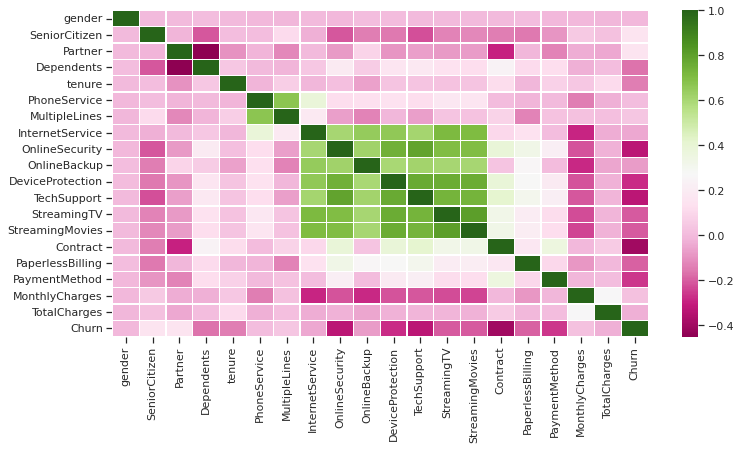

In [ ]:
plt.figure(figsize=(12, 6))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="PiYG")

Beberapa temuan yang bisa kita dapatkan dalam mencari hubungan antar kolom seperti berikut :

Hubungan positive, contoh : streaming tv - streaming movie, tech support - online security
Hubungan negative, contoh : churn - online security, churn - contract

Nampaknya, pelanggan tetap akan sangat dipengaruhi oleh 2 faktor tadi

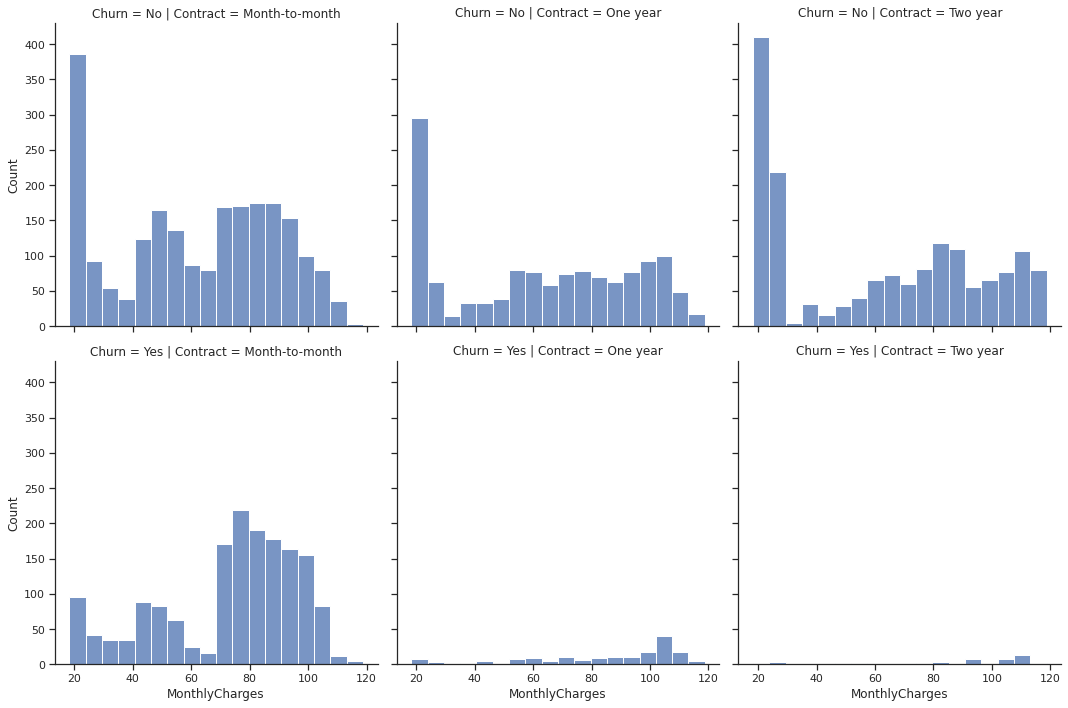

In [ ]:
sns.displot(data=df, x='MonthlyCharges', col='Contract', row='Churn')
plt.show()

Seperti yang terlihat di atas, jumlah pelanggan yang tidak kembali lebih banyak dari pada pelanggan tetap
Pelanggan tetap ada terbanyak pada kontrak bulanan dengan range pembayaran 70 - 110
Semakin lama kontrak pembayaran yang diajukan semakin sedikit pelanggan tetap yang bertahan

MODEL : RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

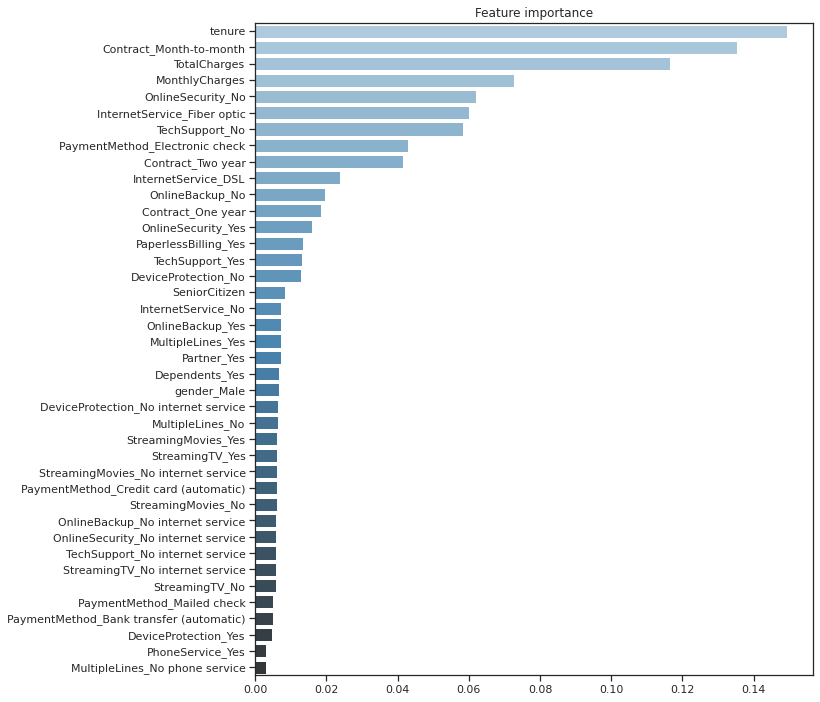

In [ ]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(df)
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

MODEL : LOGISTIC REGRESSION

In [79]:
dfz_target = df[['tenure', 'MonthlyCharges','TotalCharges', 'Churn']]
df_target.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.5,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes


In [80]:
#Menentukan target

df_x = dfz_target[['tenure', 'MonthlyCharges','TotalCharges']]
df_x.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [81]:
#Menentukan predictor

df_y = dfz_target['Churn']
df_y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [68]:
#Memisahkan Train Test

from sklearn.linear_model import LogisticRegression



In [82]:
df_x['TotalCharges'] = pd.to_numeric(df_x['TotalCharges'], errors='coerce')
print(df_x.dtypes)

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=0)

In [84]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
predictions = LR.predict(x_test)

In [86]:
LR.score(x_train,y_train)

0.7851725445582101

In [87]:
LR.coef_

array([[-0.06829992,  0.03016057,  0.00015071]])

In [77]:
# AKURASI LOGISTIC REGRESSION
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.785551763367463

In [78]:
#HASIL TRAINING 

y_test.head(10)

5561     No
5814     No
2645     No
3983    Yes
6438    Yes
4561     No
6271     No
4081    Yes
3937     No
1357     No
Name: Churn, dtype: object